# 💉 **Heart Disease Pridector**
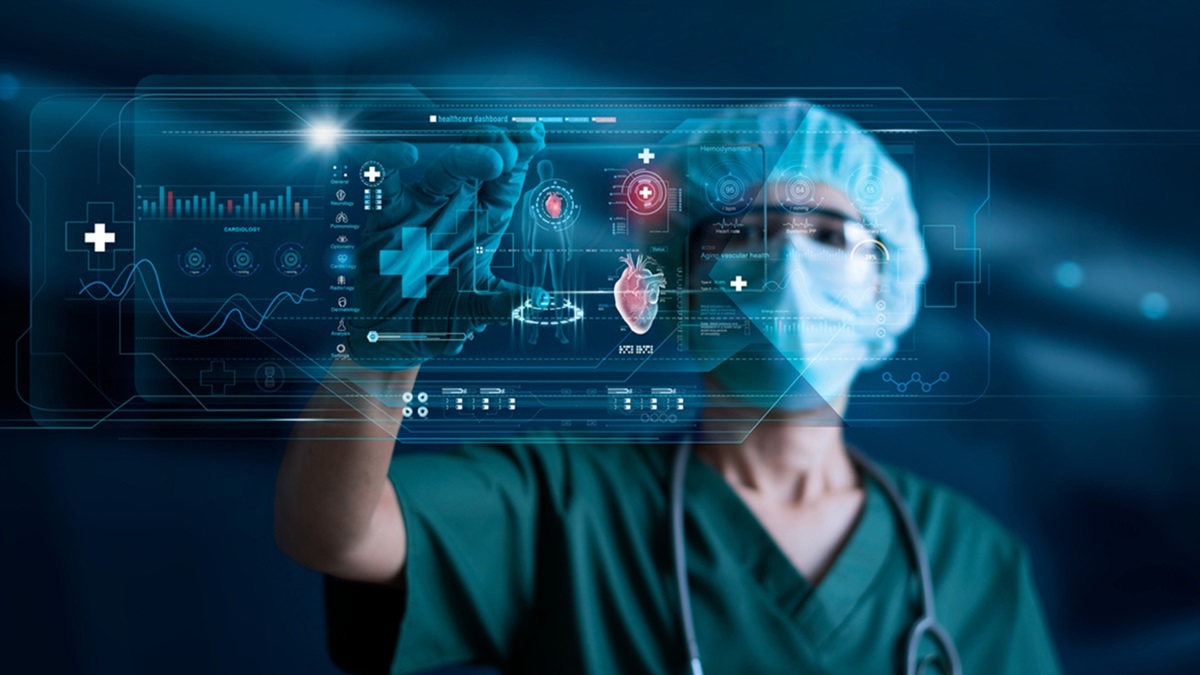

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import plotly.express as pl
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, r2_score

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
df=pd.read_excel('/content/drive/MyDrive/Heart_Disease.xlsx')
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No               3   
1           No  20.34      No              No    Yes               0   
2           No  26.58     Yes              No     No              20   
3           No  24.21      No              No     No               0   
4           No  23.71      No              No     No              28   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0            30          No  Female        55-59  White      Yes   
1             0          No  Female  80 or older  White       No   
2            30          No    Male        65-69  White      Yes   
3             0          No  Female        75-79  White       No   
4             0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good          5    Yes            No        Yes  
1              Yes  Very good          7     No            No         No  
2              Yes       Fair          8    Yes            No         No  
3               No       Good          6     No            No        Yes  
4              Yes  Very good          8     No            No         No

In [74]:
df.shape

(319795, 18)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [76]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

<Axes: xlabel='Smoking', ylabel='count'>

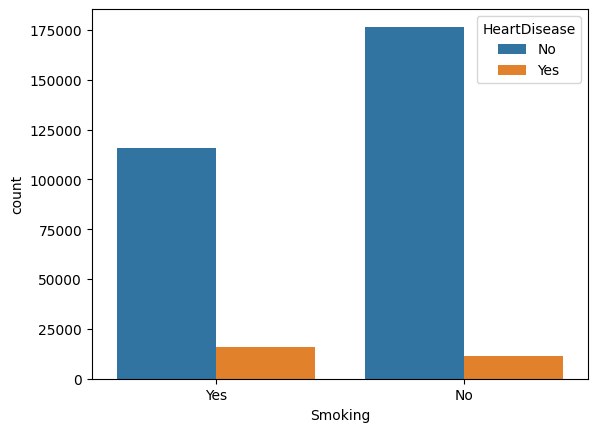

In [77]:
#sns.countplot(df.HeartDisease)
sns.countplot(x='Smoking',hue='HeartDisease',data=df)

In [78]:
data = df[df['HeartDisease']=='Yes']
data

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
5               Yes  28.87     Yes              No     No               6   
10              Yes  34.30     Yes              No     No              30   
35              Yes  32.98     Yes              No    Yes              10   
42              Yes  25.06      No              No     No               0   
43              Yes  30.23     Yes              No     No               6   
...             ...    ...     ...             ...    ...             ...   
319765          Yes  38.45      No              No    Yes              30   
319767          Yes  36.21     Yes              No     No               0   
319781          Yes  37.12     Yes              No     No               0   
319786          Yes  33.20     Yes              No     No               0   
319790          Yes  27.41     Yes              No     No               7   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
5                  0         Yes  Female        75-79     Black       No   
10                 0         Yes    Male        60-64     White      Yes   
35                 0         Yes    Male        75-79     White      Yes   
42                 0         Yes  Female  80 or older     White      Yes   
43                 2         Yes  Female        75-79     White      Yes   
...              ...         ...     ...          ...       ...      ...   
319765            15         Yes  Female        55-59  Hispanic      Yes   
319767             0         Yes  Female        75-79  Hispanic      Yes   
319781             0          No    Male        35-39  Hispanic       No   
319786             0          No  Female        60-64  Hispanic      Yes   
319790             0         Yes    Male        60-64  Hispanic      Yes   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
5                    No       Fair         12     No            No         No  
10                   No       Poor         15    Yes            No         No  
35                  Yes       Poor          4     No            No        Yes  
42                   No       Good          7     No            No        Yes  
43                  Yes       Fair          8     No           Yes         No  
...                 ...        ...        ...    ...           ...        ...  
319765              Yes       Poor          6    Yes            No         No  
319767              Yes       Good          8     No            No         No  
319781              Yes  Very good          7     No            No         No  
319786              Yes  Very good          8    Yes            No         No  
319790               No       Fair          6    Yes            No         No  

[27373 rows x 18 columns]

In [79]:
smoke=data['Smoking'].value_counts()
smoke

Smoking
Yes    16037
No     11336
Name: count, dtype: int64

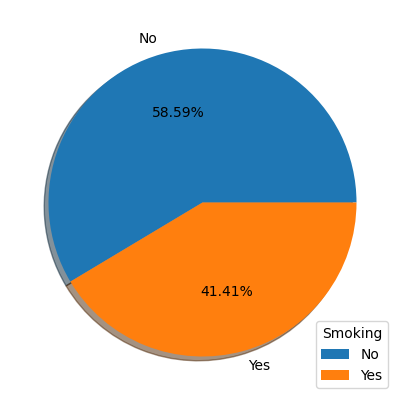

In [80]:
labels=["No",'Yes']
plt.figure(figsize=(5,5))
plt.pie(smoke,labels=labels,autopct='%2.2f%%',shadow=True)#autopct enables you to display the percent value using Python string formatting
plt.legend(title='Smoking',loc='lower right')
plt.show()

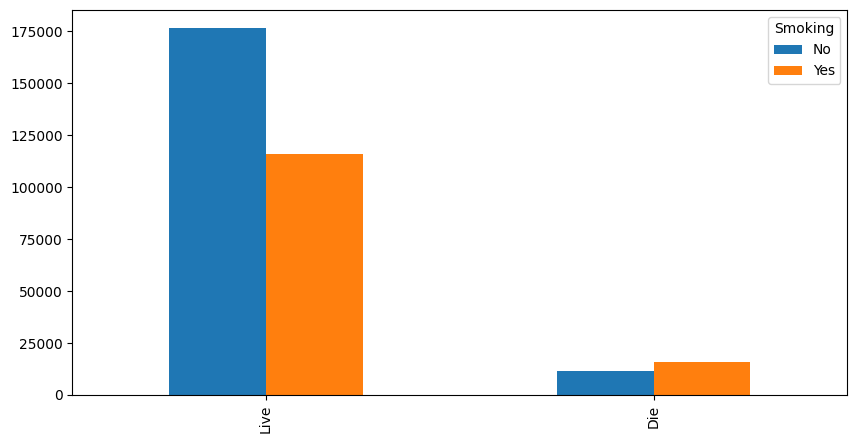

In [81]:
def  bar_chart(feature):
    live=df[df['HeartDisease']=='No'][feature].value_counts()
    die=df[df['HeartDisease']=='Yes'][feature].value_counts()
    df1=pd.DataFrame([live,die])
    df1.index=['Live','Die']
    df1.plot(kind='bar',figsize=(10,5))
bar_chart('Smoking')

<Axes: xlabel='BMI', ylabel='Density'>

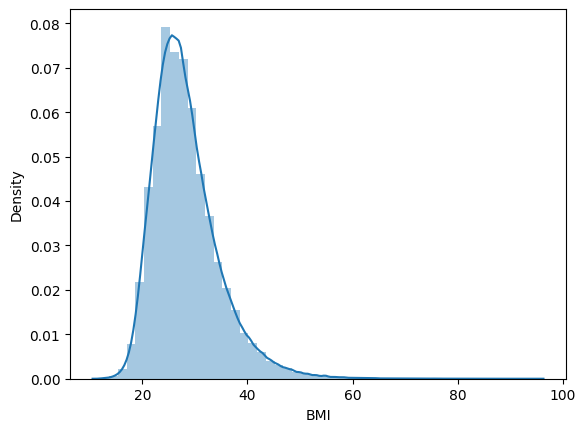

In [82]:
sns.distplot(df['BMI']) #A Distplot or distribution plot, depicts the variation in the data distribution.

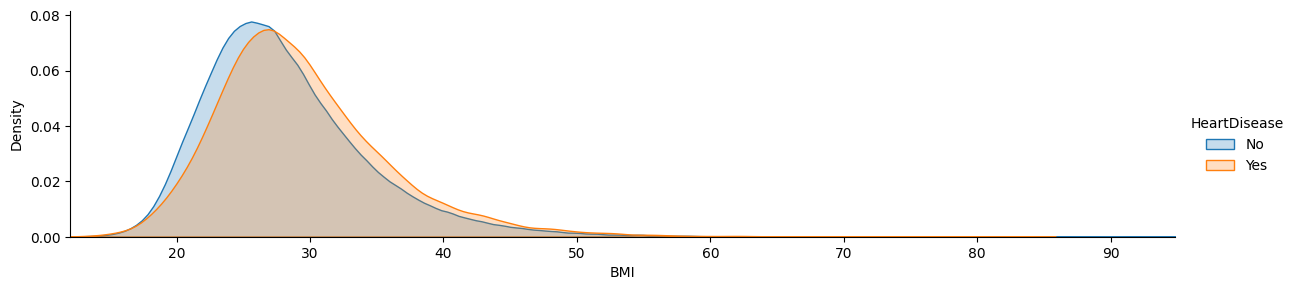

In [83]:
def kde(x):
    facet=sns.FacetGrid(df,hue="HeartDisease",aspect=4)
    facet.map(sns.kdeplot,x,shade=True)
    facet.set(xlim=(df[x].min(),df[x].max()))#Limits for each of the axes on each facet (only relevant when share{x, y} is True).
    facet.add_legend()
    plt.show()
kde('BMI')


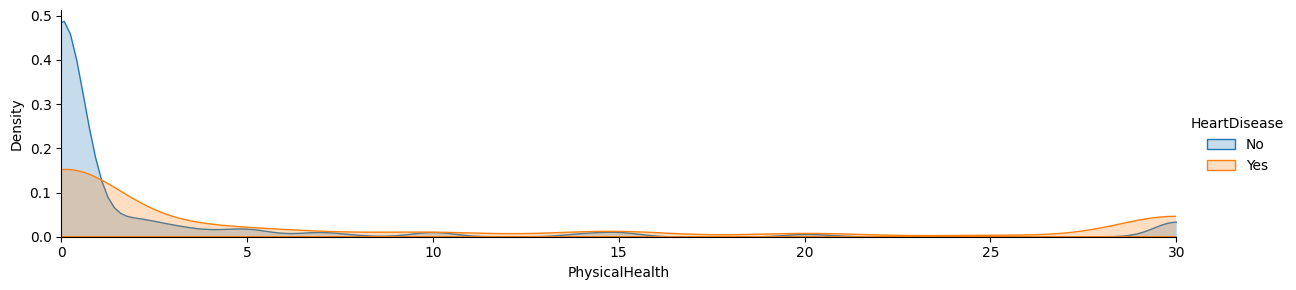

In [84]:
kde('PhysicalHealth')

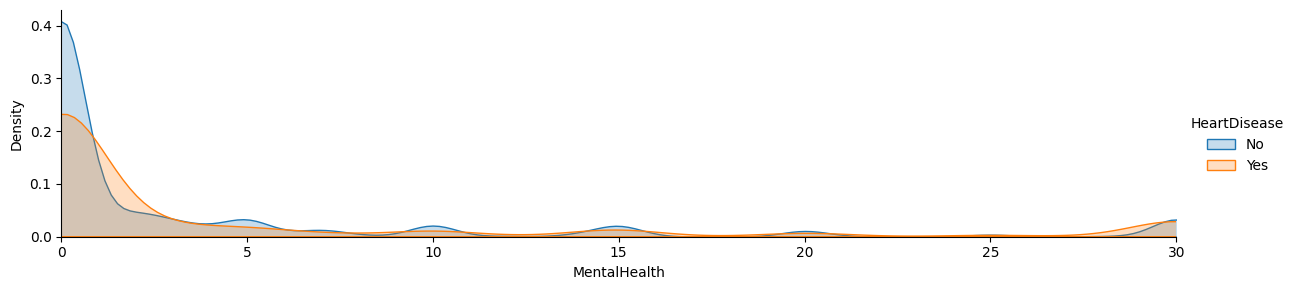

In [85]:
kde('MentalHealth')

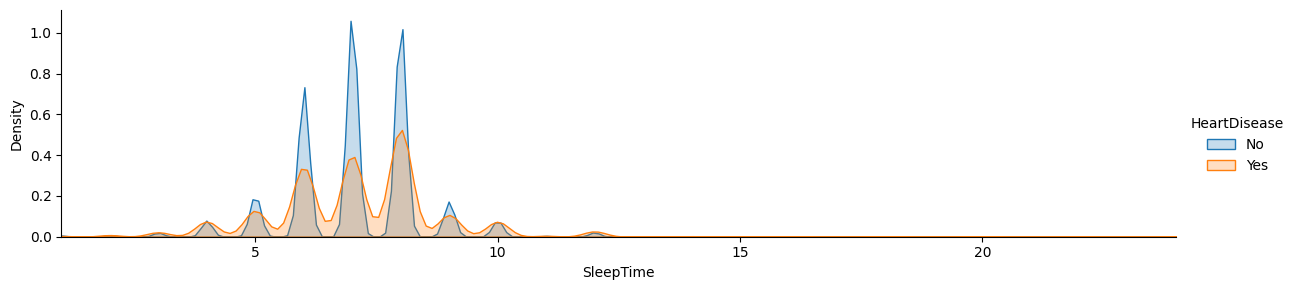

In [86]:
kde('SleepTime')


AlcoholDrinking
No     26232
Yes     1141
Name: count, dtype: int64

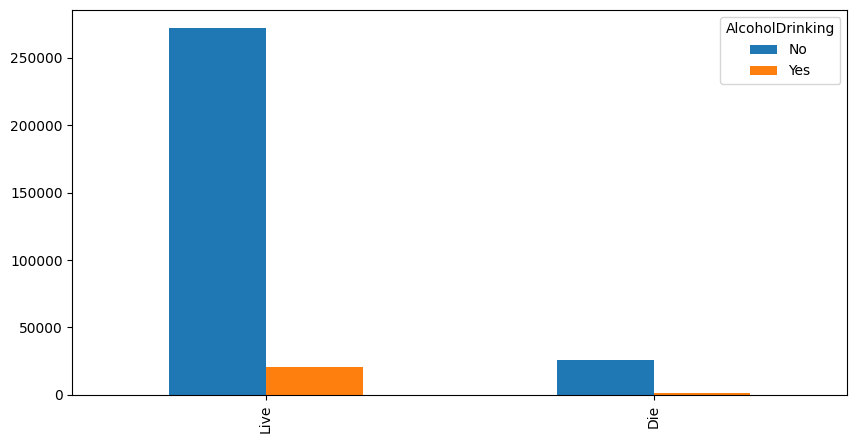

In [87]:
bar_chart('AlcoholDrinking')
AlcoholDrinking=data['AlcoholDrinking'].value_counts()
AlcoholDrinking

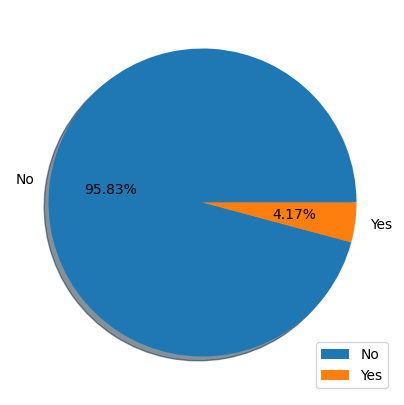

In [88]:
plt.figure(figsize=(5,5))
plt.pie(AlcoholDrinking,labels=labels,autopct='%2.2f%%',shadow=True)#autopct enables you to display the percent value using Python string formatting
plt.legend(title='',loc='lower right')
plt.show()

Stroke
No     22984
Yes     4389
Name: count, dtype: int64

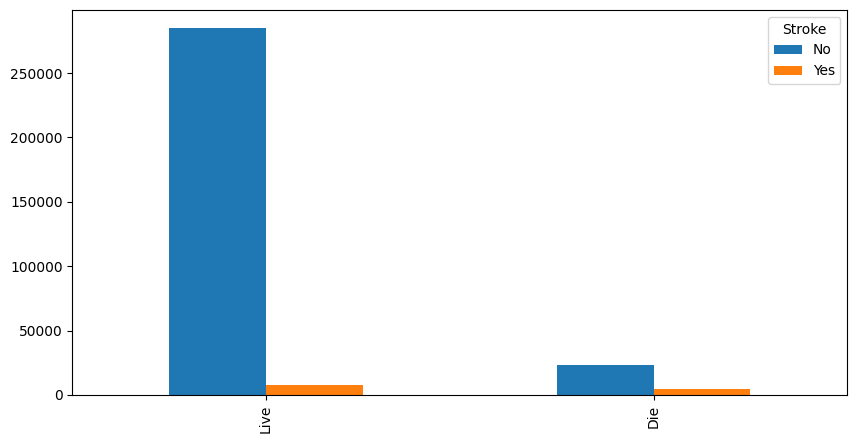

In [89]:
bar_chart('Stroke')
Stroke=data['Stroke'].value_counts()
Stroke


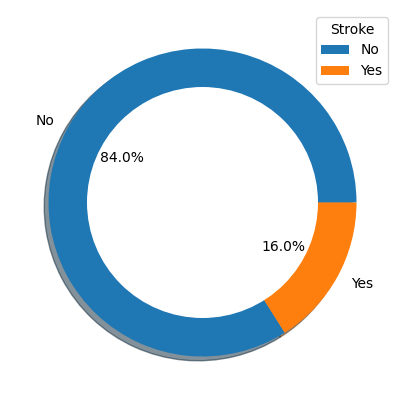

In [90]:
plt.figure(figsize=(5,5))
plt.pie(Stroke,labels=labels,autopct='%2.1f%%',shadow=True)
circle=plt.Circle(xy=(0,0),radius=0.75,facecolor='white')
plt.gca().add_artist(circle)
plt.legend(title='Stroke',loc='upper right')
plt.show()

DiffWalking
No     17345
Yes    10028
Name: count, dtype: int64

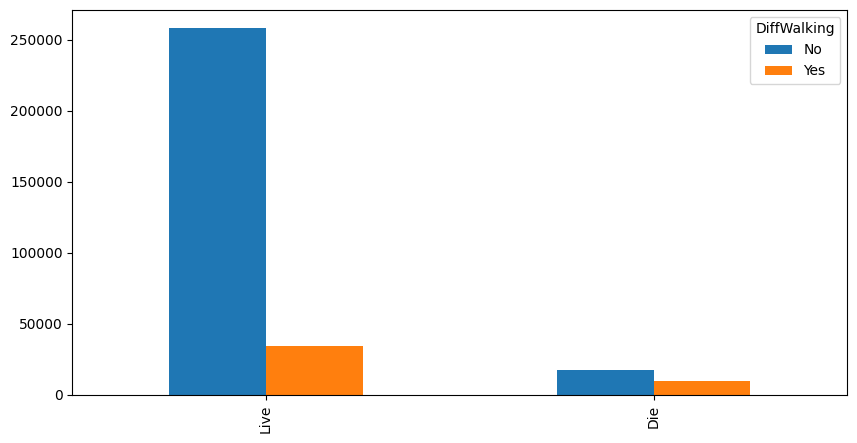

In [91]:
bar_chart('DiffWalking')
DiffWalking=data['DiffWalking'].value_counts()
DiffWalking

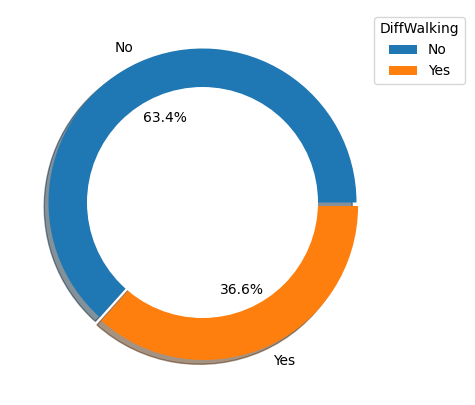

In [92]:
plt.figure(figsize=(5,5))
plt.pie(DiffWalking,labels=labels,explode=[0,0.025] ,autopct='%2.1f%%',shadow=True)
circle=plt.Circle(xy=(0,0),radius=0.75,facecolor='white')
plt.gca().add_artist(circle)
plt.legend(title='DiffWalking',loc='upper right',bbox_to_anchor=(1.2,1))
plt.show()

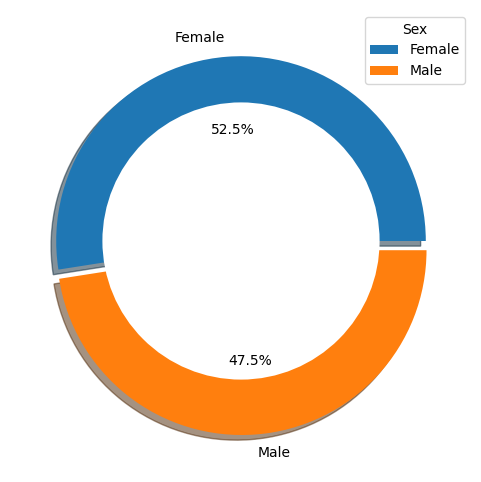

In [93]:
Sex=df['Sex'].value_counts()
Sex
labels=['Female','Male']
plt.figure(figsize=(6,6))
plt.pie(Sex,labels=labels,explode=[0,0.05] ,autopct='%2.1f%%',shadow=True)
circle=plt.Circle(xy=(0,0),radius=0.75,facecolor='white')
plt.gca().add_artist(circle)
plt.legend(title='Sex',loc='upper right')
plt.show()

In [94]:
Race=df['Race'].value_counts()
Race

Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: count, dtype: int64

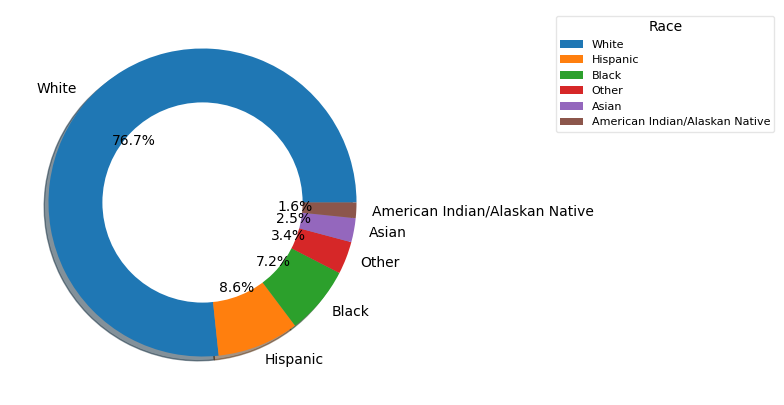

In [95]:
labels=['White','Hispanic','Black','Other','Asian','American Indian/Alaskan Native']
plt.figure(figsize=(5,5))
plt.pie(Race,labels=labels,autopct='%2.1f%%',shadow=True)
circle=plt.Circle(xy=(0,0),radius=0.65,facecolor='white')
plt.gca().add_artist(circle)
plt.legend(title='Race',loc='upper right',framealpha=0.5,fontsize=8,bbox_to_anchor=(2,1))
plt.show()

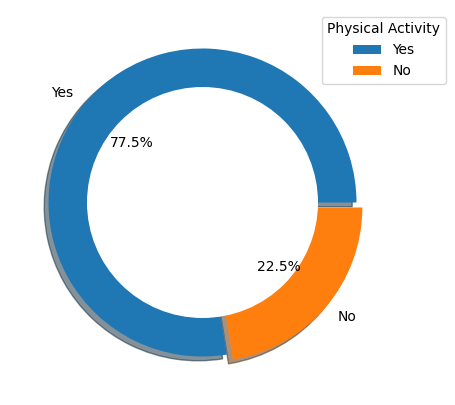

PhysicalActivity
Yes    247957
No      71838
Name: count, dtype: int64

In [96]:
PhysicalActivity=df['PhysicalActivity'].value_counts()

labels=['Yes','No']
plt.figure(figsize=(5,5))
plt.pie(PhysicalActivity,labels=labels,explode=[0,0.05] ,autopct='%2.1f%%',shadow=True)
circle=plt.Circle(xy=(0,0),radius=0.75,facecolor='white')
plt.gca().add_artist(circle)
plt.legend(title='Physical Activity',loc='upper right',bbox_to_anchor=(1.15,1))
plt.show()
PhysicalActivity

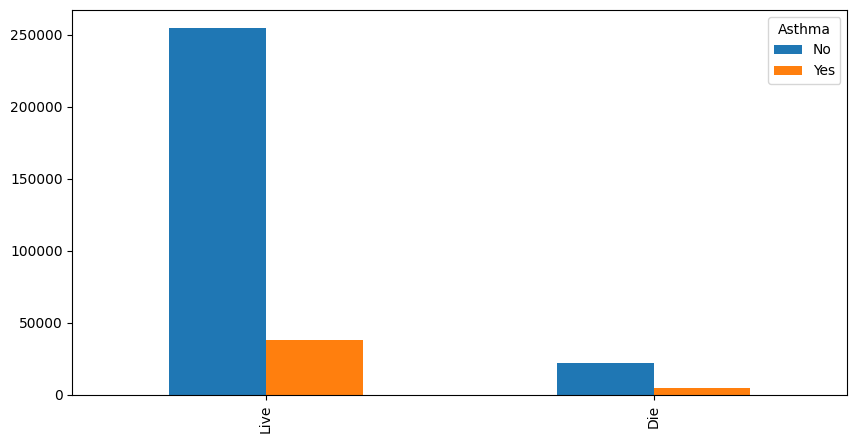

In [97]:
bar_chart('Asthma')

SkinCancer
No     22393
Yes     4980
Name: count, dtype: int64

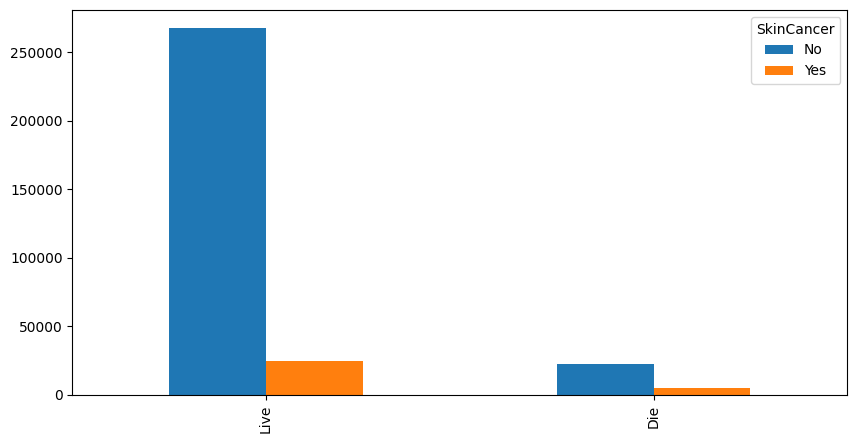

In [98]:
 SkinCancer=data['SkinCancer'].value_counts()
 bar_chart('SkinCancer')
 SkinCancer

# ✅ **Data preprocessing for balancing**

## ▶  **Label encoding**

In [99]:
le=LabelEncoder()
list=['HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
for i in list:
    df[i]=le.fit_transform(df[i])
df.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0               3   
1             0  20.34        0                0       1               0   
2             0  26.58        1                0       0              20   
3             0  24.21        0                0       0               0   
4             0  23.71        0                0       0              28   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0            30            0    0            7     5         2   
1             0            0    0           12     5         0   
2            30            0    1            9     5         2   
3             0            0    0           11     5         0   
4             0            1    0            4     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4          5       1              0           1  
1                 1          4          7       0              0           0  
2                 1          1          8       1              0           0  
3                 0          2          6       0              0           1  
4                 1          4          8       0              0           0

In [100]:
x=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']
x.sample(10)

BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
99676   30.79        1                0       0               0             0   
287013  25.77        0                0       0              30             0   
238473  29.95        1                0       0               0             0   
141031  31.74        1                0       0               0             0   
263885  23.80        0                0       0               0             0   
261696  34.46        0                0       0               0             0   
12093   25.99        1                0       1               0             0   
297265  22.46        0                0       0               0            20   
183510  31.79        1                0       1               0             0   
226066  55.74        0                0       0               0             0   

        DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  \
99676             0    0            6     5         0                 0   
287013            0    1           10     5         0                 1   
238473            0    1            8     5         0                 1   
141031            0    0            9     5         0                 1   
263885            0    0            4     3         0                 1   
261696            0    1            7     3         0                 0   
12093             0    1           11     5         0                 0   
297265            0    0            0     5         0                 1   
183510            0    1            9     5         2                 1   
226066            1    0           11     5         2                 1   

        GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
99676           0          8       0              0           0  
287013          0         10       0              0           0  
238473          2          8       1              0           0  
141031          4          7       1              0           0  
263885          0          6       0              0           0  
261696          2          7       0              0           0  
12093           4          7       0              0           1  
297265          4          8       0              0           0  
183510          4          7       0              0           0  
226066          4          9       1              1           0

## ▶   **Undersampling**

In [101]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Create a pipeline that first applies NearMiss to undersample the majority class
# and then applies SMOTE to oversample the minority class
pipeline = Pipeline([
    ('undersample', NearMiss()),
    ('oversample', SMOTE())
])

# Apply the pipeline
new_x, new_y = pipeline.fit_resample(x, y)

# Verify the new class distribution
from collections import Counter
print(Counter(new_y))


Counter({0: 27373, 1: 27373})


In [102]:
new_y.value_counts()

HeartDisease
0    27373
1    27373
Name: count, dtype: int64

In [103]:
df2=pd.DataFrame(new_x)
df2.head()

BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0  25.10        0                0       0               0             0   
1  22.24        1                0       0               0             0   
2  26.63        0                0       0               0             0   
3  25.10        0                0       0               0             0   
4  26.63        0                0       0               0             0   

   DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  GenHealth  \
0            0    1            9     5         0                 1          4   
1            0    1           11     5         0                 1          4   
2            0    0           12     5         0                 1          2   
3            0    1            9     5         0                 1          4   
4            0    0           12     5         0                 1          2   

   SleepTime  Asthma  KidneyDisease  SkinCancer  
0          7       0              0           0  
1          7       0              0           0  
2          8       0              0           0  
3          7       0              0           0  
4          8       0              0           0

In [104]:
df3=pd.DataFrame(new_y)
df3.head()


HeartDisease
0             0
1             0
2             0
3             0
4             0

In [105]:
df4=pd.concat([df2,df3],axis=1)
df4

BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0      25.10        0                0       0               0             0   
1      22.24        1                0       0               0             0   
2      26.63        0                0       0               0             0   
3      25.10        0                0       0               0             0   
4      26.63        0                0       0               0             0   
...      ...      ...              ...     ...             ...           ...   
54741  38.45        0                0       1              30            15   
54742  36.21        1                0       0               0             0   
54743  37.12        1                0       0               0             0   
54744  33.20        1                0       0               0             0   
54745  27.41        1                0       0               7             0   

       DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  \
0                0    1            9     5         0                 1   
1                0    1           11     5         0                 1   
2                0    0           12     5         0                 1   
3                0    1            9     5         0                 1   
4                0    0           12     5         0                 1   
...            ...  ...          ...   ...       ...               ...   
54741            1    0            7     3         2                 1   
54742            1    0           11     3         2                 1   
54743            0    1            3     3         0                 1   
54744            0    0            8     3         2                 1   
54745            1    1            8     3         2                 0   

       GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  HeartDisease  
0              4          7       0              0           0             0  
1              4          7       0              0           0             0  
2              2          8       0              0           0             0  
3              4          7       0              0           0             0  
4              2          8       0              0           0             0  
...          ...        ...     ...            ...         ...           ...  
54741          3          6       1              0           0             1  
54742          2          8       0              0           0             1  
54743          4          7       0              0           0             1  
54744          4          8       1              0           0             1  
54745          1          6       1              0           0             1  

[54746 rows x 18 columns]

Feature ranking

In [106]:
df4.nunique()

BMI                 2267
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             22
Asthma                 2
KidneyDisease          2
SkinCancer             2
HeartDisease           2
dtype: int64

In [107]:

extr = ExtraTreesClassifier()
extr.fit(new_x,new_y)
feature_importance = extr.feature_importances_
feature_importance

array([0.24020373, 0.00875056, 0.00714496, 0.04000542, 0.13866365,
       0.07693467, 0.11183385, 0.00619314, 0.03420534, 0.04400247,
       0.07536541, 0.05881339, 0.05237176, 0.03727183, 0.03751837,
       0.01946995, 0.01125151])

In [108]:
imp = pd.DataFrame(feature_importance, columns=['Gain_Score'])
imp.head(10)

Gain_Score
0    0.240204
1    0.008751
2    0.007145
3    0.040005
4    0.138664
5    0.076935
6    0.111834
7    0.006193
8    0.034205
9    0.044002

In [109]:
new_x.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [110]:
cols = pd.DataFrame(new_x.columns, columns=['Feature_Names'])
cols.head(10)

Feature_Names
0              BMI
1          Smoking
2  AlcoholDrinking
3           Stroke
4   PhysicalHealth
5     MentalHealth
6      DiffWalking
7              Sex
8      AgeCategory
9             Race

In [111]:
gains = pd.concat([cols,imp],axis=1)
gains

Feature_Names  Gain_Score
0                BMI    0.240204
1            Smoking    0.008751
2    AlcoholDrinking    0.007145
3             Stroke    0.040005
4     PhysicalHealth    0.138664
5       MentalHealth    0.076935
6        DiffWalking    0.111834
7                Sex    0.006193
8        AgeCategory    0.034205
9               Race    0.044002
10          Diabetic    0.075365
11  PhysicalActivity    0.058813
12         GenHealth    0.052372
13         SleepTime    0.037272
14            Asthma    0.037518
15     KidneyDisease    0.019470
16        SkinCancer    0.011252

In [112]:
newx = gains.nlargest(18,'Gain_Score')
newx

Feature_Names  Gain_Score
0                BMI    0.240204
4     PhysicalHealth    0.138664
6        DiffWalking    0.111834
5       MentalHealth    0.076935
10          Diabetic    0.075365
11  PhysicalActivity    0.058813
12         GenHealth    0.052372
9               Race    0.044002
3             Stroke    0.040005
14            Asthma    0.037518
13         SleepTime    0.037272
8        AgeCategory    0.034205
15     KidneyDisease    0.019470
16        SkinCancer    0.011252
1            Smoking    0.008751
2    AlcoholDrinking    0.007145
7                Sex    0.006193

<Axes: xlabel='Gain_Score', ylabel='Feature_Names'>

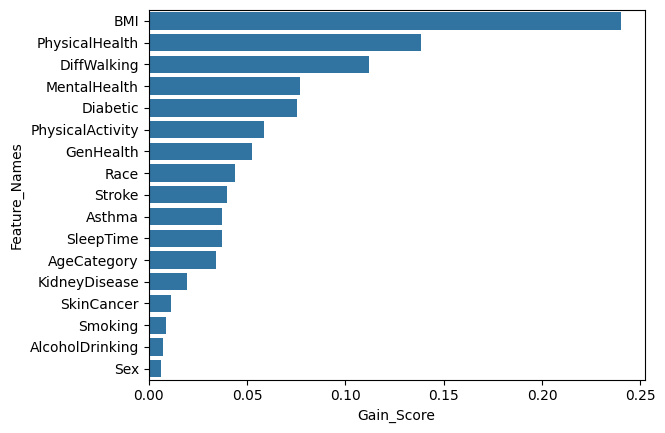

In [113]:
sns.barplot(x='Gain_Score',y='Feature_Names',data=newx)

<Axes: >

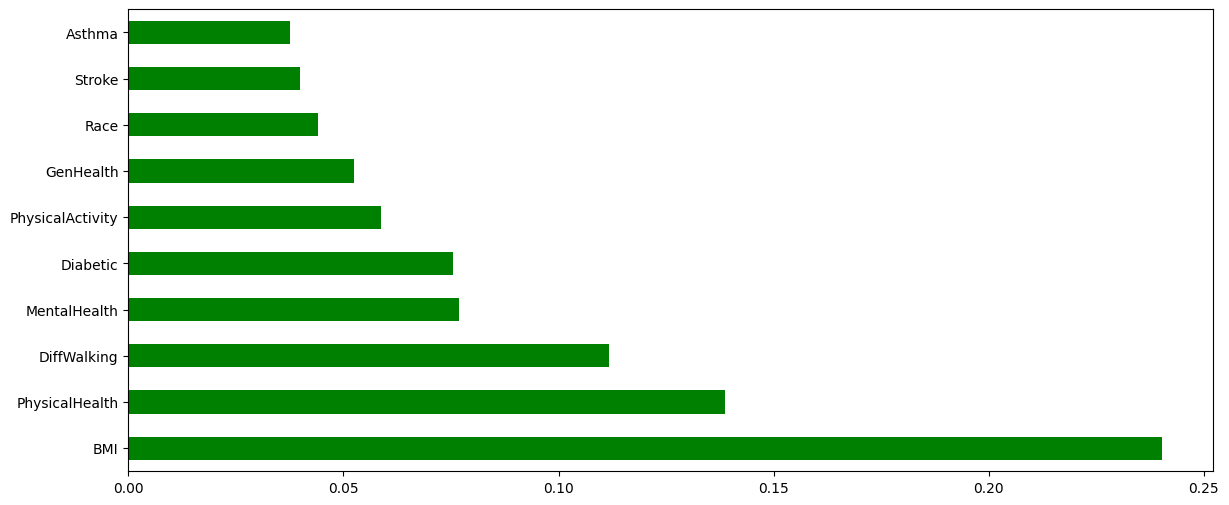

In [114]:
features = pd.Series(extr.feature_importances_, index = x.columns)
plt.figure(figsize=(14,6))
features.nlargest(10).plot(kind='barh', color='g')

In [115]:

model2 = SelectKBest(score_func=f_classif)
feature_score = model2.fit(new_x,new_y)
feature_score.scores_


array([3.75440127e+03, 2.03552236e+03, 6.95297966e+02, 4.83533549e+03,
       1.25312036e+04, 6.96957949e+03, 1.36347702e+04, 2.23507248e+02,
       2.12111452e+00, 4.54938853e+03, 9.24225452e+03, 9.11220252e+03,
       1.44917353e+03, 4.00600240e+02, 4.86418830e+03, 3.66576795e+03,
       9.91111023e+02])

In [116]:
cols = pd.DataFrame(feature_score.scores_ , columns=['Feature_Scores'])
cols

Feature_Scores
0      3754.401268
1      2035.522364
2       695.297966
3      4835.335493
4     12531.203572
5      6969.579494
6     13634.770216
7       223.507248
8         2.121115
9      4549.388533
10     9242.254520
11     9112.202523
12     1449.173526
13      400.600240
14     4864.188299
15     3665.767952
16      991.111023

In [117]:
col2 = pd.DataFrame(new_x.columns, columns=['Feature_Names'])
col2.head()

Feature_Names
0              BMI
1          Smoking
2  AlcoholDrinking
3           Stroke
4   PhysicalHealth

In [118]:
scores = pd.concat([col2,cols],axis=1)
scores

Feature_Names  Feature_Scores
0                BMI     3754.401268
1            Smoking     2035.522364
2    AlcoholDrinking      695.297966
3             Stroke     4835.335493
4     PhysicalHealth    12531.203572
5       MentalHealth     6969.579494
6        DiffWalking    13634.770216
7                Sex      223.507248
8        AgeCategory        2.121115
9               Race     4549.388533
10          Diabetic     9242.254520
11  PhysicalActivity     9112.202523
12         GenHealth     1449.173526
13         SleepTime      400.600240
14            Asthma     4864.188299
15     KidneyDisease     3665.767952
16        SkinCancer      991.111023

In [119]:
new = scores.nlargest(18,'Feature_Scores')
new

Feature_Names  Feature_Scores
6        DiffWalking    13634.770216
4     PhysicalHealth    12531.203572
10          Diabetic     9242.254520
11  PhysicalActivity     9112.202523
5       MentalHealth     6969.579494
14            Asthma     4864.188299
3             Stroke     4835.335493
9               Race     4549.388533
0                BMI     3754.401268
15     KidneyDisease     3665.767952
1            Smoking     2035.522364
12         GenHealth     1449.173526
16        SkinCancer      991.111023
2    AlcoholDrinking      695.297966
13         SleepTime      400.600240
7                Sex      223.507248
8        AgeCategory        2.121115

Text(0.5, 1.0, 'Feature ranking using SelectKBest classifier')

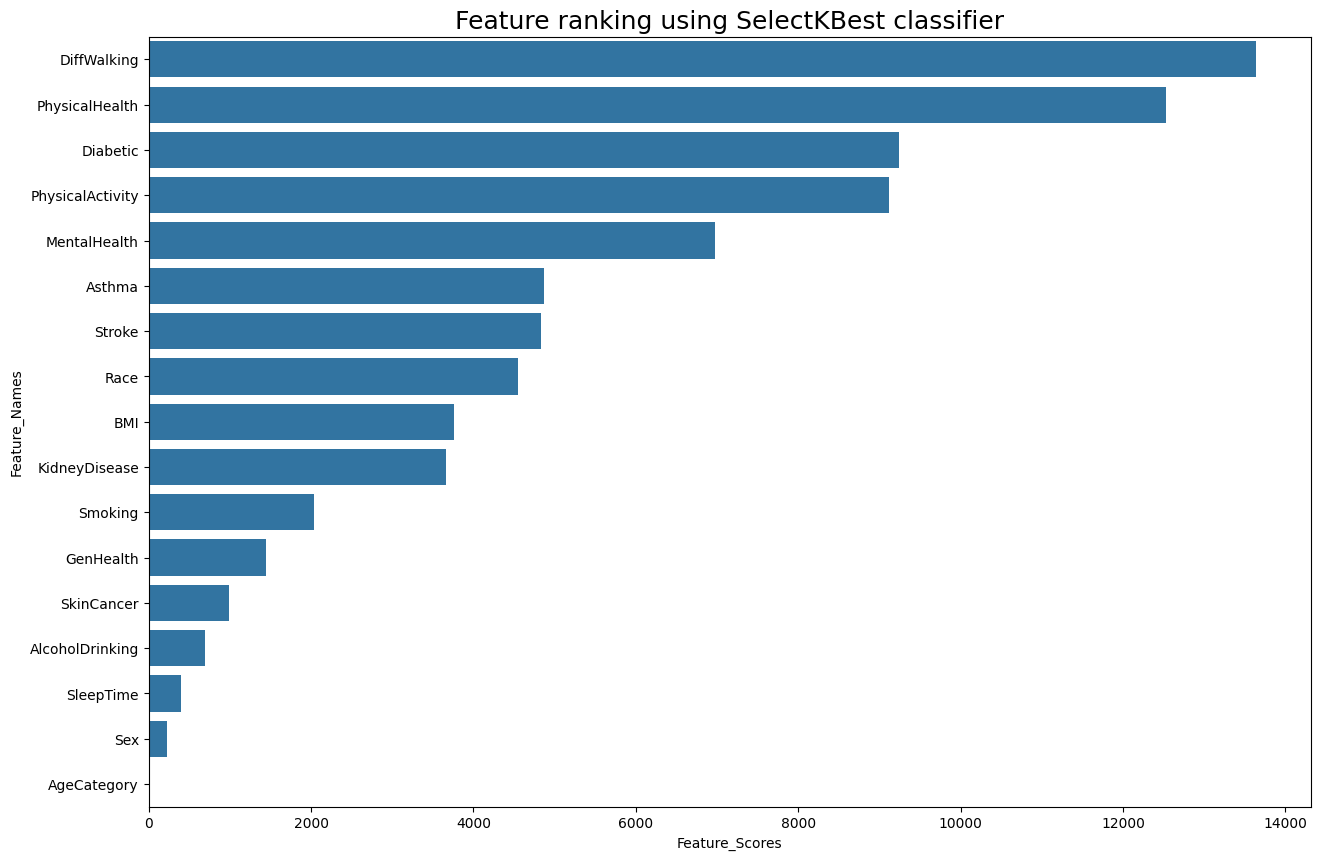

In [120]:
plt.figure(figsize=(15,10))
sns.barplot(x='Feature_Scores',y='Feature_Names',data=new)
plt.title('Feature ranking using SelectKBest classifier',fontsize=18)

PCA

In [121]:
#FEATURE SCALING

mmx = MinMaxScaler()
scaled_x = mmx.fit_transform(new_x)
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_x)
x_pca

array([[-0.66189778, -0.02120894,  0.29702488],
       [-0.25531847,  0.6498457 , -0.31888643],
       [-0.37867518, -0.74643734, -0.25384386],
       ...,
       [-0.23144408,  0.65957632, -0.28594832],
       [ 0.30978133, -0.11683497, -0.80244112],
       [ 1.24147939,  0.43433291,  0.48569291]])

In [122]:
features = pd.DataFrame(x_pca, columns=['pca1','pca2','pca3'])
pl.scatter_3d(features, x='pca1',y='pca2',z='pca3', color='pca1')

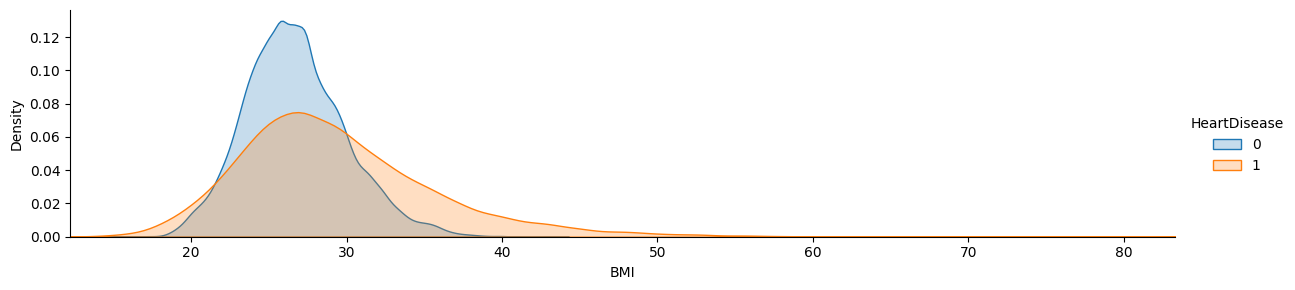

In [123]:
def KDE(x):
    facet=sns.FacetGrid(df4,hue="HeartDisease",aspect=4)
    facet.map(sns.kdeplot,x,shade=True)
    facet.set(xlim=(df4[x].min(),df4[x].max()))
    facet.add_legend()
    plt.show()
KDE('BMI')

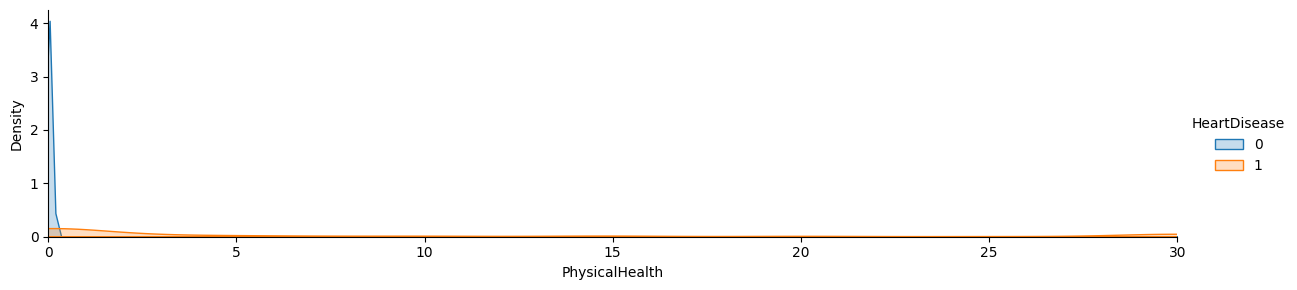

In [124]:
KDE('PhysicalHealth')

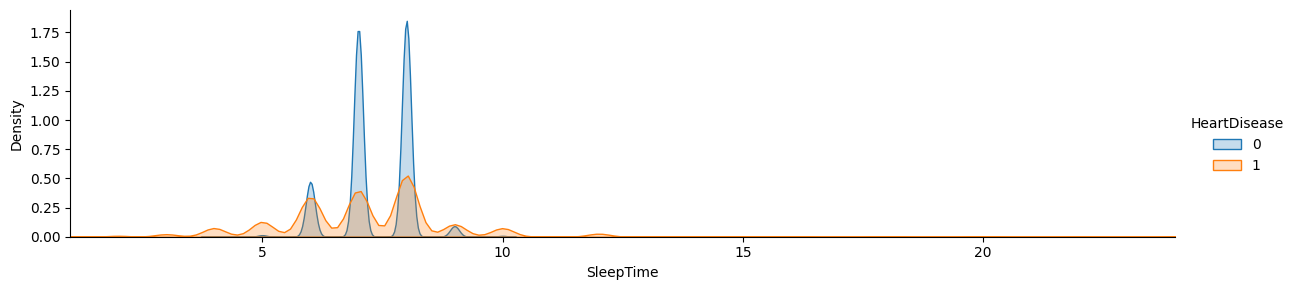

In [125]:
KDE('SleepTime')

In [126]:
df4.corr()

BMI   Smoking  AlcoholDrinking    Stroke  \
BMI               1.000000  0.049441         0.014670  0.068767   
Smoking           0.049441  1.000000         0.092053  0.076455   
AlcoholDrinking   0.014670  0.092053         1.000000  0.024267   
Stroke            0.068767  0.076455         0.024267  1.000000   
PhysicalHealth    0.192687  0.133507         0.039746  0.236168   
MentalHealth      0.145983  0.112300         0.072052  0.171132   
DiffWalking       0.257873  0.128243         0.026511  0.256971   
Sex               0.066262  0.101611         0.008041 -0.045099   
AgeCategory      -0.185498  0.005786        -0.059917  0.015393   
Race             -0.114441 -0.028858        -0.012962 -0.140675   
Diabetic          0.293306  0.099076        -0.007564  0.169159   
PhysicalActivity -0.210051 -0.128546        -0.042995 -0.172935   
GenHealth        -0.031508 -0.014393        -0.000983 -0.067838   
SleepTime        -0.067029 -0.025905        -0.002374 -0.018876   
Asthma            0.164275  0.067483         0.024382  0.132583   
KidneyDisease     0.120651  0.042515         0.000318  0.137583   
SkinCancer       -0.018091  0.026792         0.009680  0.043969   
HeartDisease      0.253337  0.189340         0.111989  0.284882   

                  PhysicalHealth  MentalHealth  DiffWalking       Sex  \
BMI                     0.192687      0.145983     0.257873  0.066262   
Smoking                 0.133507      0.112300     0.128243  0.101611   
AlcoholDrinking         0.039746      0.072052     0.026511  0.008041   
Stroke                  0.236168      0.171132     0.256971 -0.045099   
PhysicalHealth          1.000000      0.440993     0.520376 -0.089319   
MentalHealth            0.440993      1.000000     0.325887 -0.114732   
DiffWalking             0.520376      0.325887     1.000000 -0.134294   
Sex                    -0.089319     -0.114732    -0.134294  1.000000   
AgeCategory            -0.039676     -0.168178     0.070244 -0.114715   
Race                   -0.149459     -0.156602    -0.178967  0.071277   
Diabetic                0.264498      0.169367     0.300179 -0.004047   
PhysicalActivity       -0.365403     -0.237850    -0.412700  0.099627   
GenHealth              -0.082941     -0.065910    -0.113529 -0.016024   
SleepTime              -0.105898     -0.138065    -0.075224  0.018666   
Asthma                  0.240992      0.209618     0.245212 -0.100898   
KidneyDisease           0.237105      0.137120     0.240233 -0.046308   
SkinCancer              0.053826      0.013027     0.068561  0.066207   
HeartDisease            0.431588      0.336057     0.446543 -0.063767   

                  AgeCategory      Race  Diabetic  PhysicalActivity  \
BMI                 -0.185498 -0.114441  0.293306         -0.210051   
Smoking              0.005786 -0.028858  0.099076         -0.128546   
AlcoholDrinking     -0.059917 -0.012962 -0.007564         -0.042995   
Stroke               0.015393 -0.140675  0.169159         -0.172935   
PhysicalHealth      -0.039676 -0.149459  0.264498         -0.365403   
MentalHealth        -0.168178 -0.156602  0.169367         -0.237850   
DiffWalking          0.070244 -0.178967  0.300179         -0.412700   
Sex                 -0.114715  0.071277 -0.004047          0.099627   
AgeCategory          1.000000  0.128077  0.034799         -0.061437   
Race                 0.128077  1.000000 -0.170362          0.143604   
Diabetic             0.034799 -0.170362  1.000000         -0.237781   
PhysicalActivity    -0.061437  0.143604 -0.237781          1.000000   
GenHealth            0.048086  0.073850 -0.086368          0.085209   
SleepTime            0.165630  0.066569 -0.035786          0.038776   
Asthma              -0.096953 -0.141057  0.158339         -0.162920   
KidneyDisease        0.046253 -0.085409  0.224841         -0.174271   
SkinCancer           0.217923  0.079320  0.032502         -0.022121   
HeartDisease         0.006225 -0.276996  0.380054         -0.377755   

           

<Axes: >

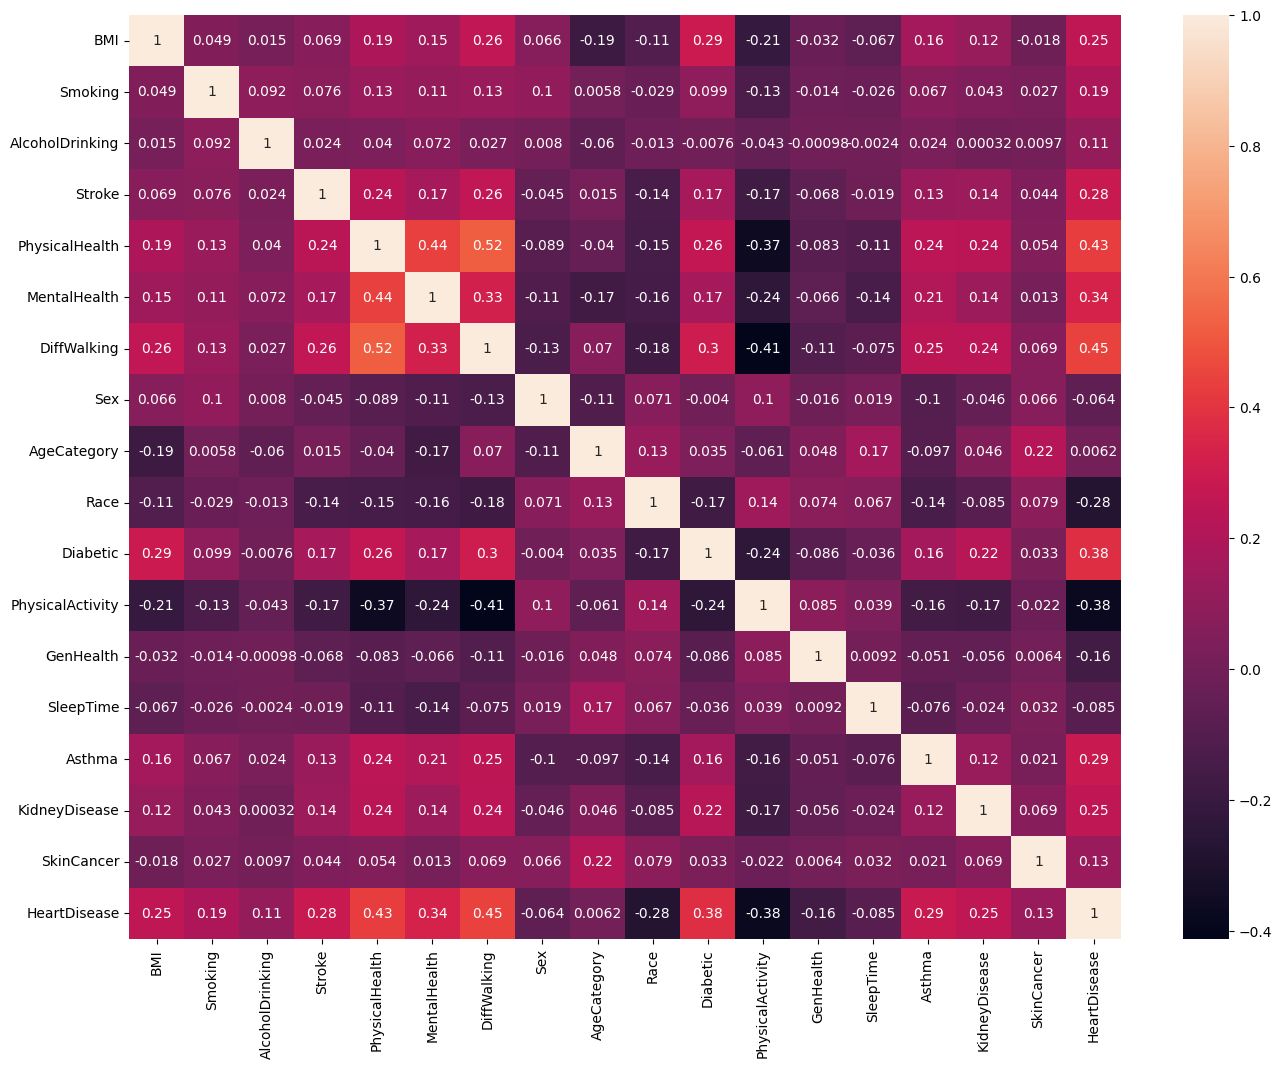

In [127]:
plt.figure(figsize=(16,12))
sns.heatmap(df4.corr(),annot=True)

## ▶ **Compairing ML algorithms accuracy**



In [128]:
from sklearn.metrics import accuracy_score
# Split the data into training, validation and test sets
xtrain, xtest, ytrain, ytest = train_test_split(new_x, new_y, test_size=0.2, random_state=42)
xval, xtest, yval, ytest = train_test_split(xtest, ytest, test_size=0.5, random_state=42)

algorithms = [
    ("Logistic Regression", LogisticRegression()),
    ("KNN Classification", KNeighborsClassifier(n_neighbors=50)),
    ("AdaBoost Classifier", AdaBoostClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("XGB Classifier", XGBClassifier()),
    ("SVM", SVC(kernel='linear')),
    ("Random Forest", RandomForestClassifier())
]
best_algorithm = None
best_accuracy = 0

# Create lists to store model names and test accuracy
model_name = []
test = []

for name, clf in algorithms:
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xval)
    accuracy = accuracy_score(yval, y_pred)
    print(f"{name} - Accuracy: {accuracy}")

    # Save the best algorithm
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_algorithm = (name, clf)

    # Append model name and test accuracy to lists
    model_name.append(name)
    test.append(accuracy)

print(f"\nBest algorithm: {best_algorithm[1]}")




Logistic Regression - Accuracy: 0.8765296803652968
KNN Classification - Accuracy: 0.8427397260273972
AdaBoost Classifier - Accuracy: 0.8922374429223744
Decision Tree - Accuracy: 0.8451141552511415
XGB Classifier - Accuracy: 0.8984474885844749
SVM - Accuracy: 0.8677625570776256
Random Forest - Accuracy: 0.8555251141552511

Best algorithm: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=No

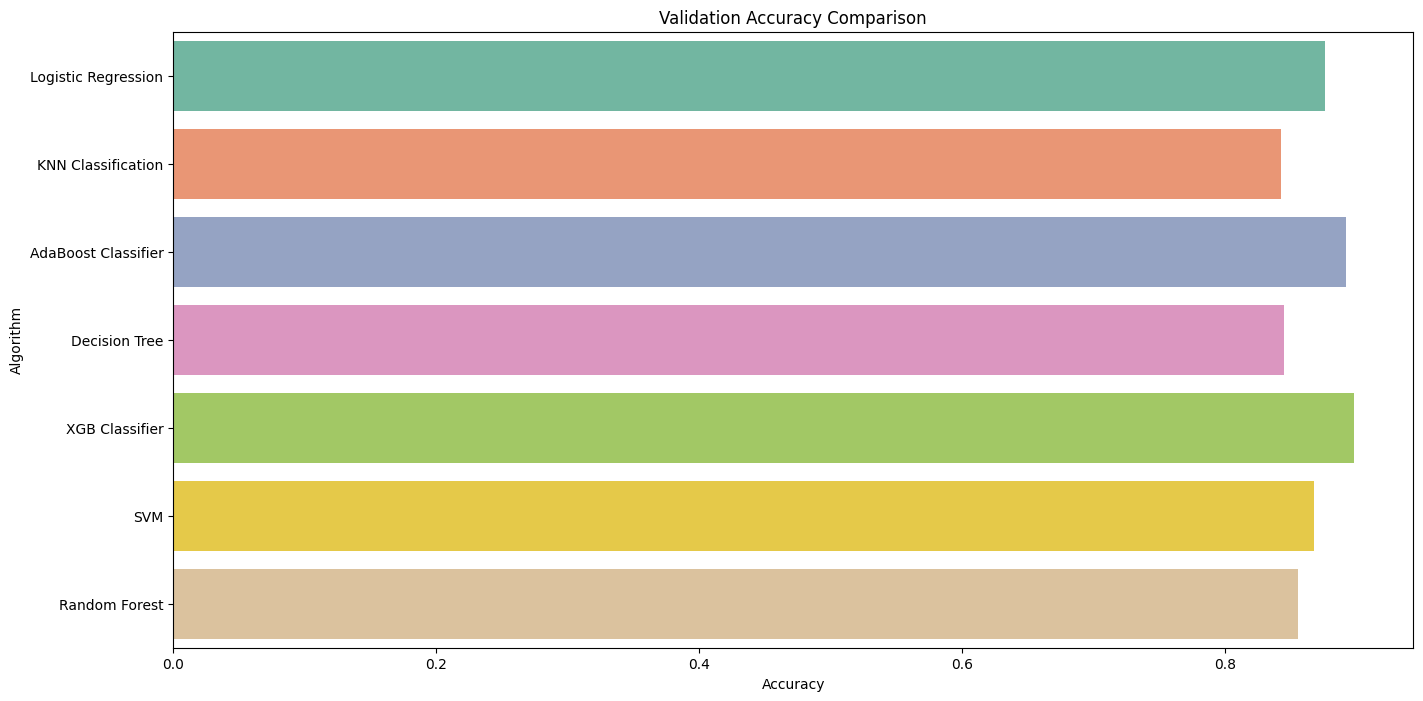

In [129]:
# Create a dataframe with the model names and test accuracy
data = pd.DataFrame({'Algorithm': model_name, 'Accuracy': test})

# Create a figure with the validation accuracy
plt.figure(figsize=(16,8))
plt.title('Validation Accuracy Comparison')
sns.barplot(y="Algorithm", x='Accuracy', data=data, palette='Set2')
plt.show()

In [130]:
# Train the best algorithm on the entire training data
best_algorithm[1].fit(xtrain, ytrain)

# Evaluate the best algorithm on the training data
y_train_pred = best_algorithm[1].predict(xtrain)
train_accuracy = accuracy_score(ytrain, y_train_pred)
print(f"\nTrain Accuracy of Best Model: {train_accuracy}")

# Evaluate the best algorithm on the test data
y_test_pred = best_algorithm[1].predict(xtest)
test_accuracy = accuracy_score(ytest, y_test_pred)
print(f"\nTest Accuracy of Best Model: {test_accuracy}")


Train Accuracy of Best Model: 0.9099917800712394

Test Accuracy of Best Model: 0.8957077625570776


In [131]:

best_algorithm[1].fit(xtrain, ytrain)
y_test_pred = best_algorithm[1].predict(xtest)
print(f"\nReport for {best_algorithm[1]}")
print(classification_report(ytest, y_test_pred))


Report for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2704
           1       0.94      0.85      0.89      2771

    accuracy                           0.90      5475
   macro avg

In [132]:
 y_test_pred = best_algorithm[1].predict(xtest)
print("Predicted values: ", y_test_pred)

Predicted values:  [1 1 1 ... 0 1 0]


In [133]:

correct_predictions = sum(y_test_pred == ytest)
percentage_correct = correct_predictions / len(ytest) * 100
print(f"Percentage of correct predictions: {percentage_correct:.2f}%")
class_counts = Counter(ytest)
class_percentages = {k: v/len(ytest)*100 for k,v in class_counts.items()}
print(f"Percentage of predictions for each class:\n{class_percentages}")

Percentage of correct predictions: 89.57%
Percentage of predictions for each class:
{1: 50.61187214611872, 0: 49.38812785388128}


In [134]:


# Generate confusion matrix for the best algorithm on the test set
y_test_pred = best_algorithm[1].predict(xtest)
conf_matrix = confusion_matrix(ytest, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2549  155]
 [ 416 2355]]


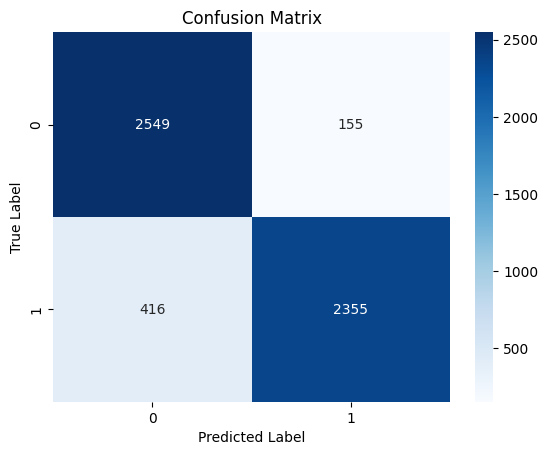

In [135]:

# Generate confusion matrix for the best algorithm on the test set
y_test_pred = best_algorithm[1].predict(xtest)
conf_matrix = confusion_matrix(ytest, y_test_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues")

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

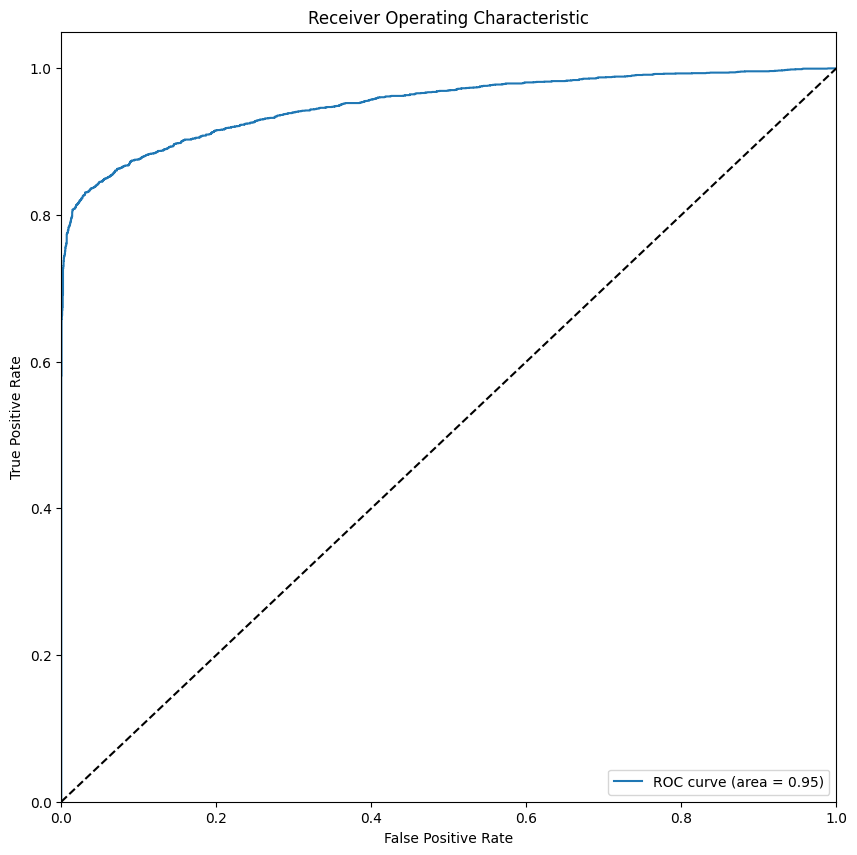

R2 score: 0.5827685677312999
MSE: 0.10429223744292238
MAE: 0.10429223744292238


In [136]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
# Compute ROC curve and AUC for the best algorithm
fpr, tpr, thresholds = roc_curve(ytest, best_algorithm[1].predict_proba(xtest)[:, 1])
roc_auc = auc(fpr, tpr)

# Compute R2 score for the best algorithm
y_test_pred = best_algorithm[1].predict(xtest)
r2 = r2_score(ytest, y_test_pred)
MSE = mean_squared_error(ytest, y_test_pred)
MAE = mean_absolute_error(ytest, y_test_pred)
# Plot ROC curve
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print R2 score
print(f"R2 score: {r2}")
print(f"MSE: {MSE}")
print(f"MAE: {MAE}")

# **✅Save model**

In [137]:
import pickle

# Assuming best_algorithm[1] is your trained XGBClassifier
with open('heart_disease_predictor.pkl', 'wb') as f:
    pickle.dump(best_algorithm[1], f)


# 🚑 **Deployment**

In [147]:
# An example of  input data
patient_data = [[34.55, 1, 0, 1, 30, 0, 1, 0, 7, 5, 2, 0, 1, 5, 1, 1, 0]]

# Make a prediction with the best algorithm
prediction = best_algorithm[1].predict(patient_data)

if prediction[0] == 1:
    print("The model predicts that you have heart disease.")
else:
    print("The model predicts that you don't have heart disease.")


The model predicts that you have heart disease.


In [157]:
# add a friendly user Interface
!pip install gradio


In [149]:
import pickle
import gradio as gr
import numpy as np


encoding_maps = {
    'Smoking': {'Yes': 1, 'No': 0},
    'AlcoholDrinking': {'Yes': 1, 'No': 0},
    'Stroke': {'Yes': 1, 'No': 0},
    'DiffWalking': {'Yes': 1, 'No': 0},
    'Sex': {'Female': 0, 'Male': 1},
    'AgeCategory': {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12},
    'Race': {'White': 0, 'Black': 1, 'Asian': 2, 'American Indian/Alaskan Native': 3, 'Other': 4},
    'Diabetic': {'Yes': 1, 'No': 0, 'No, borderline diabetes': 2},
    'PhysicalActivity': {'Yes': 1, 'No': 0},
    'GenHealth': {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4},
    'Asthma': {'Yes': 1, 'No': 0},
    'KidneyDisease': {'Yes': 1, 'No': 0},
    'SkinCancer': {'Yes': 1, 'No': 0}
}

#  the prediction function
def predict_heart_disease(BMI, Smoking, AlcoholDrinking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease, SkinCancer):

    # Encode categorical inputs
    Smoking = encoding_maps['Smoking'][Smoking]
    AlcoholDrinking = encoding_maps['AlcoholDrinking'][AlcoholDrinking]
    Stroke = encoding_maps['Stroke'][Stroke]
    DiffWalking = encoding_maps['DiffWalking'][DiffWalking]
    Sex = encoding_maps['Sex'][Sex]
    AgeCategory = encoding_maps['AgeCategory'][AgeCategory]
    Race = encoding_maps['Race'][Race]
    Diabetic = encoding_maps['Diabetic'][Diabetic]
    PhysicalActivity = encoding_maps['PhysicalActivity'][PhysicalActivity]
    GenHealth = encoding_maps['GenHealth'][GenHealth]
    Asthma = encoding_maps['Asthma'][Asthma]
    KidneyDisease = encoding_maps['KidneyDisease'][KidneyDisease]
    SkinCancer = encoding_maps['SkinCancer'][SkinCancer]

    inputs = np.array([[BMI, Smoking, AlcoholDrinking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease, SkinCancer]])

    # Make the prediction
    prediction = best_algorithm.predict(inputs)

    return "There is heart disease" if prediction else "There is no heart disease"

# Create the Gradio interface using components
demo = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Textbox(label="BMI (e.g., 25.34)"),
        gr.Dropdown(choices=['Yes', 'No'], label="Smoking"),
        gr.Dropdown(choices=['Yes', 'No'], label="Alcohol Drinking"),
        gr.Dropdown(choices=['Yes', 'No'], label="Stroke"),
        gr.Slider(0, 30, step=1, label="Physical Health"),
        gr.Slider(0, 30, step=1, label="Mental Health"),
        gr.Dropdown(choices=['Yes', 'No'], label="Difficulty Walking"),
        gr.Dropdown(choices=['Female', 'Male'], label="Sex"),
        gr.Dropdown(choices=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'], label="Age Category"),
        gr.Dropdown(choices=['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other'], label="Race"),
        gr.Dropdown(choices=['Yes', 'No', 'No, borderline diabetes'], label="Diabetic"),
        gr.Dropdown(choices=['Yes', 'No'], label="Physical Activity"),
        gr.Dropdown(choices=['Poor', 'Fair', 'Good', 'Very good', 'Excellent'], label="General Health"),
        gr.Slider(0, 24, step=1, label="Sleep Time"),
        gr.Dropdown(choices=['Yes', 'No'], label="Asthma"),
        gr.Dropdown(choices=['Yes', 'No'], label="Kidney Disease"),
        gr.Dropdown(choices=['Yes', 'No'], label="Skin Cancer"),
    ],
    outputs="text",
    title="Heart Disease Predictor",
    description="Enter your information to predict whether you are at risk of heart disease."
)

# Launch the interface
demo.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2ffe530162c9fefa08.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
